In [ ]:
import os


# 🔤 Classes à capturer (modifie cette liste selon tes besoins)
CLASSES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
           'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
           'U', 'V', 'W', 'X', 'Y', 'Z', 'SPACE', 'DELETE']

# 📂 Dossier de destination pour les images  
BASE_DIR = "keypoints_dataset"

# 📂 Création des dossiers
for label in CLASSES:
    path = os.path.join(BASE_DIR, label)
    os.makedirs(path, exist_ok=True)

print("✅ Dossiers créés pour chaque classe :", CLASSES)


In [ ]:
import mediapipe as mp  
import cv2  
import numpy as np  
import uuid  
import os  
import time  

# Configuration de MediaPipe Hands
mp_mains = mp.solutions.hands
mains = mp_mains.Hands(static_image_mode=False, max_num_hands=1)
mp_dessin = mp.solutions.drawing_utils

# Initialisation de la webcam
capture = cv2.VideoCapture(0)

print("Appuyez sur 'l' pour enregistrer 20 échantillons. 'q' pour quitter.")

en_collecte = False
echantillons_collectes = 0
label = ""
total_echantillons = 40
dossier_sauvegarde = "../keypoints_dataset"

while True:
    succes, image = capture.read()
    if not succes:
        break

    # Prétraitement de l'image
    image = cv2.flip(image, 1)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resultats = mains.process(image_rgb)

    if resultats.multi_hand_landmarks:
        points_main = resultats.multi_hand_landmarks[0]
        mp_dessin.draw_landmarks(image, points_main, mp_mains.HAND_CONNECTIONS)

        if en_collecte:
            points_cles = []
            for point in points_main.landmark:
                points_cles.extend([point.x, point.y, point.z])

            dossier_label = os.path.join(dossier_sauvegarde, label)

            # Sauvegarde des points clés
            nom_fichier = f"{label}_{uuid.uuid4()}.npy"
            chemin_fichier = os.path.join(dossier_label, nom_fichier)
            np.save(chemin_fichier, np.array(points_cles))
            echantillons_collectes += 1
            print(f"[{echantillons_collectes}/{total_echantillons}] Échantillon enregistré pour '{label}'")

            time.sleep(1)  # Pause entre les captures

            if echantillons_collectes >= total_echantillons:
                en_collecte = False
                echantillons_collectes = 0
                print(f"✅ Collecte terminée : {total_echantillons} échantillons pour '{label}'")
        
    # Affichage de l'image
    cv2.imshow("Capture - 'l' pour démarrer la collecte", image)

    touche = cv2.waitKey(1) & 0xFF

    if touche == ord('l') and not en_collecte:
        label = input("Entrez le label de la lettre (A-Z) : ").upper()
        en_collecte = True
        print(f"Début de la collecte de {total_echantillons} échantillons pour '{label}'...")

    elif touche == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()

Press 'l' to label and record 20 samples. Press 'q' to quit.


In [ ]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Chemin du dossier contenant les données
dataset_path = "../data/keypoints_dataset"

X = []
y = []

# Charger les données depuis chaque dossier de lettres
for label in sorted(os.listdir(dataset_path)):
    label_dir = os.path.join(dataset_path, label)
    
    if not os.path.isdir(label_dir):
        continue  

    for file in os.listdir(label_dir):
        if file.endswith(".npy"):
            file_path = os.path.join(label_dir, file)
            keypoints = np.load(file_path)
            X.append(keypoints)
            y.append(label)

# Convertir en array NumPy
X = np.array(X)
y = np.array(y)

print(f"Total samples: {len(X)}")
print(f"Shape of X: {X.shape}")
print(f"Example label: {y[0]}")

total_samples = 0

for label in sorted(os.listdir(dataset_path)):
    label_dir = os.path.join(dataset_path, label)
    if not os.path.isdir(label_dir):
        continue  # Ignore files that are not directories

    num_samples = 0
    for file in os.listdir(label_dir):
        if file.endswith(".npy"):
            num_samples += 1

    total_samples += num_samples
    print(f"Label: {label}, Number of samples: {num_samples}")

print(f"\n✅ Total number of samples in dataset: {total_samples}")

        



Total samples: 1100
Shape of X: (1100, 63)
Example label: A
Label: A, Number of samples: 40
Label: B, Number of samples: 40
Label: C, Number of samples: 40
Label: D, Number of samples: 40
Label: DELETE, Number of samples: 20
Label: E, Number of samples: 40
Label: F, Number of samples: 40
Label: G, Number of samples: 40
Label: H, Number of samples: 40
Label: I, Number of samples: 40
Label: J, Number of samples: 40
Label: K, Number of samples: 40
Label: L, Number of samples: 40
Label: M, Number of samples: 40
Label: N, Number of samples: 40
Label: O, Number of samples: 40
Label: P, Number of samples: 40
Label: Q, Number of samples: 40
Label: R, Number of samples: 40
Label: S, Number of samples: 40
Label: SPACE, Number of samples: 20
Label: T, Number of samples: 40
Label: U, Number of samples: 60
Label: V, Number of samples: 40
Label: W, Number of samples: 40
Label: X, Number of samples: 40
Label: Y, Number of samples: 40
Label: Z, Number of samples: 40

✅ Total number of samples in datas

In [15]:
print(sorted(os.listdir(dataset_path)))


['A', 'B', 'C', 'D', 'DELETE', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'SPACE', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [4]:
# Encoder les lettres en entiers (ex: A -> 0, B -> 1, ...)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Labels:", sorted(set(y)))
print("Encoded labels:", sorted(set(y_encoded)))


Labels: ['A', 'B', 'C', 'D', 'DELETE', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'SPACE', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Encoded labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Jeu d'entraînement :", X_train.shape)  
print("Jeu de test :", X_test.shape)  


Jeu d'entraînement : (880, 63)
Jeu de test : (220, 63)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
X_train.shape

(880, 63)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Nombre de classes (lettres différentes)
num_classes = len(np.unique(y_encoded))

# Architecture du modèle
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Affichage du résumé
model.summary()


c:\Users\P1\Desktop\Real-Time Sign Language Recognition\mediapipe-env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 28)             │         1,820 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,268 (71.36 KB)

 Trainable params: 18,268 (71.36 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_data=(X_test, y_test)
)



Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1030 - loss: 3.2389 - val_accuracy: 0.4909 - val_loss: 2.4240
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3272 - loss: 2.4437 - val_accuracy: 0.6182 - val_loss: 1.7208
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5048 - loss: 1.8332 - val_accuracy: 0.7364 - val_loss: 1.1753
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5960 - loss: 1.3051 - val_accuracy: 0.8000 - val_loss: 0.8474
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6835 - loss: 1.0498 - val_accuracy: 0.8818 - val_loss: 0.6554
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7197 - loss: 0.8490 - val_accuracy: 0.8955 - val_loss: 0.5379
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.8297 - val_accuracy: 0.8773 - val_loss: 0.4805
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7818 - loss: 0.7228 - val_accuracy: 0.9273 - val_loss:

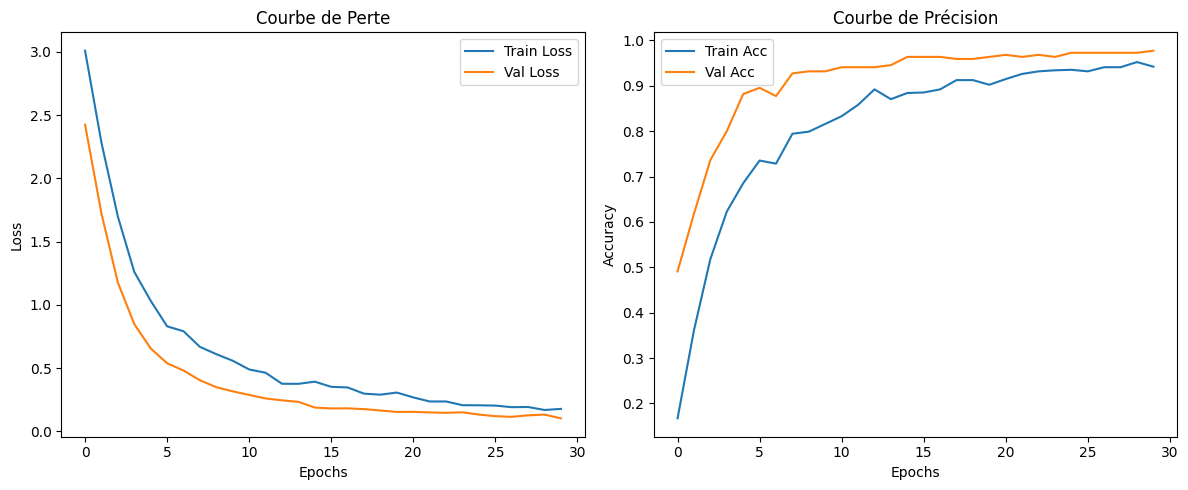

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Courbe de Perte')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Courbe de Précision')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
# Évaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test accuracy: {accuracy:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9504 - loss: 0.1784 
✅ Test accuracy: 0.98


In [83]:
model.save('../saved_models/sign_language_mlp_model3.h5')
print("Modèle sauvegardé avec succès.")


Modèle sauvegardé avec succès.


In [84]:
from tensorflow.keras.models import load_model

# Charger le modèle
model = load_model('../saved_models/sign_language_mlp_model3.h5')
print("Modèle chargé avec succès.")


Modèle chargé avec succès.


In [ ]:
import cv2  
import mediapipe as mp  
import numpy as np 
import pickle  
import tensorflow as tf  
import time  

# Chargement du modèle et des préprocesseurs
modele = tf.keras.models.load_model('../saved_models/sign_language_mlp_model2.h5')
with open('scaler.pkl', 'rb') as f:
    normaliseur = pickle.load(f)
with open('label_encoder.pkl', 'rb') as f:
    encodeur_labels = pickle.load(f)

# Configuration de la détection des mains
mp_mains = mp.solutions.hands
mains = mp_mains.Hands(static_image_mode=False, max_num_hands=1)
mp_dessin = mp.solutions.drawing_utils

# Initialisation de la webcam
capture = cv2.VideoCapture(0)

texte_saisi = ""
derniere_prediction = ""
dernier_temps = time.time()

while True:
    succes, image = capture.read()
    if not succes:
        break
    
    # Prétraitement de l'image
    image = cv2.flip(image, 1)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Détection des mains
    resultats = mains.process(image_rgb)

    if resultats.multi_hand_landmarks:
        points_main = resultats.multi_hand_landmarks[0]
        mp_dessin.draw_landmarks(image, points_main, mp_mains.HAND_CONNECTIONS)

        # Extraction des caractéristiques
        points_cles = []
        for point in points_main.landmark:
            points_cles.extend([point.x, point.y, point.z])

        # Préparation des données
        points_cles = np.array(points_cles).reshape(1, -1)
        points_normalises = normaliseur.transform(points_cles)
        
        # Prédiction
        probabilites = modele.predict(points_normalises, verbose=0)
        index_prediction = np.argmax(probabilites)
        label_prediction = encodeur_labels.inverse_transform([index_prediction])[0]

        # Filtrage temporel des prédictions
        if label_prediction != derniere_prediction:
            dernier_temps = time.time()
            derniere_prediction = label_prediction
        elif time.time() - dernier_temps > 3.0:
            if label_prediction.lower() == "space":
                texte_saisi += " "
            elif label_prediction.lower() == "delete":
                texte_saisi = texte_saisi[:-1]
            else:
                texte_saisi += label_prediction
            derniere_prediction = ""
            time.sleep(0.5)  

        # Affichage de la prédiction
        cv2.putText(image, f'Prediction: {label_prediction}', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    else:
        cv2.putText(image, 'Aucune main detectee', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Affichage du texte accumulé
    cv2.putText(image, f'Texte: {texte_saisi}', (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)

    cv2.imshow('Reconnaissance de Langue des Signes', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()